# Logistic Regression and Maximum Likelihood Estimation (MLE): A Beginner-Friendly Guide 🚀

Welcome! This notebook is a comprehensive, beginner-friendly, and concise guide to understanding logistic regression and its statistical foundation, Maximum Likelihood Estimation (MLE). You'll learn the theory, see practical code examples, and visualize key concepts with clear plots and images.

---

## Table of Contents
1. What is Supervised Learning?
2. Regression vs. Classification
3. Linear Regression Recap
4. Why Linear Regression Fails for Classification
5. Introduction to Logistic Regression
6. The Sigmoid Function
7. Maximum Likelihood Estimation (MLE) Intuition
8. MLE for Binomial Variables: Coin Flip Example
9. MLE and Logistic Regression: Mathematical Connection
10. Gradient Descent: Concept and Visualization
11. Implementing Logistic Regression with scikit-learn
12. Model Evaluation and Interpretation

---

# 1. What is Supervised Learning?

Supervised learning is a type of machine learning where we teach a model using **labeled data**—that is, data where the correct answer (label) is already known. The model learns to map inputs (features) to outputs (labels) so it can make predictions on new, unseen data.

## The AI Hierarchy

Below is a simple diagram showing where supervised learning fits in the world of AI:

```
Artificial Intelligence
    └── Machine Learning
        ├── Supervised Learning (we are here!)
        │   ├── Classification (cat vs dog)
        │   └── Regression (predict house prices)
        └── Unsupervised Learning
```

## Example: Labeled Data

Let's look at a small pandas DataFrame as an example of labeled data.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example labeled data: Predict if someone will buy a product
example_data = {
    'Age': [22, 35, 47, 25, 52],
    'Income': [25000, 48000, 60000, 32000, 72000],
    'Will_Buy': ['No', 'Yes', 'Yes', 'No', 'Yes']  # Label
}
df = pd.DataFrame(example_data)
display(df)

,Age,Income,Will_Buy
0,22,25000,No
1,35,48000,Yes
2,47,60000,Yes
3,25,32000,No
4,52,72000,Yes


# 2. Regression vs. Classification

Supervised learning problems are usually either **regression** or **classification**:

- **Regression**: Predicts a continuous number (e.g., house price, temperature)
- **Classification**: Predicts a category or class (e.g., spam/not spam, pass/fail)

Let's visualize the difference between regression and classification using matplotlib plots.

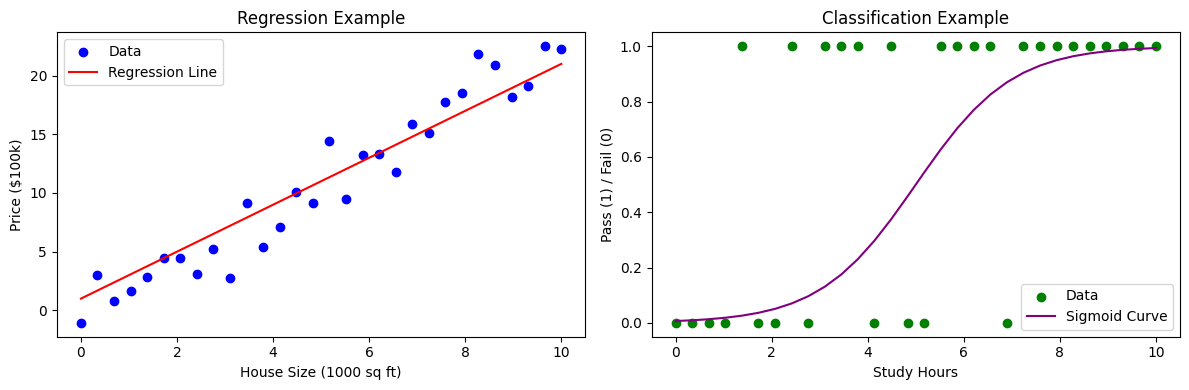

In [28]:
# Visualizing Regression vs Classification
plt.figure(figsize=(12, 4))

# Regression: Predicting house price from size
plt.subplot(1, 2, 1)
x = np.linspace(0, 10, 30)
y = 2 * x + 1 + np.random.normal(0, 2, 30)
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, 2 * x + 1, color='red', label='Regression Line')
plt.title('Regression Example')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('Price ($100k)')
plt.legend()

# Classification: Predicting pass/fail from study hours
plt.subplot(1, 2, 2)
study_hours = np.linspace(0, 10, 30)
pass_prob = 1 / (1 + np.exp(-(study_hours - 5)))
results = np.random.binomial(1, pass_prob)
plt.scatter(study_hours, results, color='green', label='Data')
plt.plot(study_hours, pass_prob, color='purple', label='Sigmoid Curve')
plt.title('Classification Example')
plt.xlabel('Study Hours')
plt.ylabel('Pass (1) / Fail (0)')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Linear Regression Recap

Linear regression is used to predict a continuous value by fitting a straight line to the data. Let's briefly review how it works by fitting a line to age vs. income data and plotting the result.

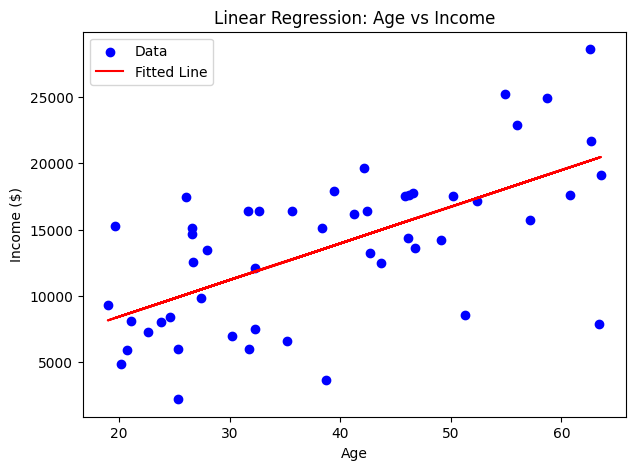

In [29]:
from sklearn.linear_model import LinearRegression

# Generate synthetic age and income data
np.random.seed(42)
age = np.random.uniform(18, 65, 50)
income = 2000 + 300 * age + np.random.normal(0, 5000, 50)

# Fit linear regression
model = LinearRegression()
age_reshaped = age.reshape(-1, 1)
model.fit(age_reshaped, income)
pred_income = model.predict(age_reshaped)

plt.figure(figsize=(7, 5))
plt.scatter(age, income, color='blue', label='Data')
plt.plot(age, pred_income, color='red', label='Fitted Line')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Linear Regression: Age vs Income')
plt.legend()
plt.show()

# 4. Why Linear Regression Fails for Classification

Linear regression is not suitable for predicting binary outcomes (like yes/no, 0/1). It can predict values outside the [0, 1] range, which doesn't make sense for probabilities. Let's see this problem in action by fitting linear regression to binary data.

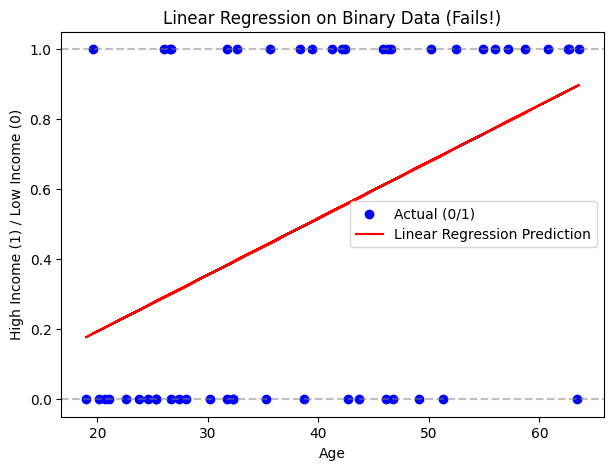

In [30]:
# Generate binary outcome data from age
income_binary = (income > np.median(income)).astype(int)

# Fit linear regression to binary data
lin_reg_bin = LinearRegression()
lin_reg_bin.fit(age_reshaped, income_binary)
pred_bin = lin_reg_bin.predict(age_reshaped)

plt.figure(figsize=(7, 5))
plt.scatter(age, income_binary, color='blue', label='Actual (0/1)')
plt.plot(age, pred_bin, color='red', label='Linear Regression Prediction')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axhline(1, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('High Income (1) / Low Income (0)')
plt.title('Linear Regression on Binary Data (Fails!)')
plt.legend()
plt.show()

# 5. Introduction to Logistic Regression

**Logistic regression** is designed for classification problems. Instead of predicting values directly, it predicts the probability that an input belongs to a particular class (e.g., 0 or 1).

## The Logistic Regression Formula

The model predicts the probability using the **sigmoid function**:

$$
P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-z}} \quad \text{where} \quad z = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n
$$

- The output is always between 0 and 1 (perfect for probabilities!)
- The curve is S-shaped (sigmoid)

![Sigmoid S-curve](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

Let's explore the sigmoid function next.

# 6. The Sigmoid Function

The **sigmoid function** (also called the logistic function) is the mathematical heart of logistic regression. It transforms any real number into a value between 0 and 1.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- When $z$ is very large, $\sigma(z) \approx 1$
- When $z$ is very small, $\sigma(z) \approx 0$
- When $z = 0$, $\sigma(z) = 0.5$

Let's plot the sigmoid function and annotate the decision boundary at 0.5.

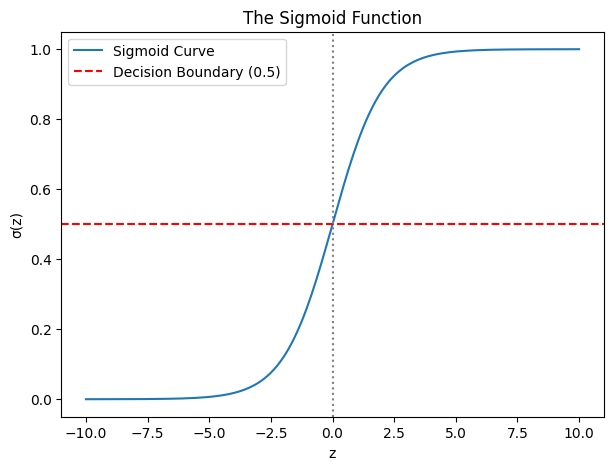

In [31]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
s = sigmoid(z)

plt.figure(figsize=(7, 5))
plt.plot(z, s, label='Sigmoid Curve')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.axvline(0, color='gray', linestyle=':')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('The Sigmoid Function')
plt.legend()
plt.show()

# 7. Maximum Likelihood Estimation (MLE) Intuition

Let's break down the idea of **likelihood** and **probability** with a simple coin example:

### Imagine This:
- You flip a coin 100 times and get 55 heads.
- You want to know: *What is the most likely probability that this coin lands on heads?*

### What's the difference between probability and likelihood?
- **Probability**: If you know the coin is fair (p=0.5), what's the chance of getting 55 heads?
- **Likelihood**: Given you saw 55 heads, which value of p (the probability of heads) makes this result most likely?

### MLE in Plain English
- We try different values for p (from 0 to 1).
- For each p, we calculate how likely it is to get 55 heads out of 100 flips.
- The p that gives the highest likelihood is our best guess for the coin's true probability.

### Why does this make sense?
- If you saw 55 heads out of 100, the most reasonable guess is p = 0.55.
- If you try p = 0.9, it's very unlikely to get only 55 heads.
- If you try p = 0.2, it's also very unlikely to get 55 heads.

Let's see this visually in the next cell!

Trying different probabilities for the coin:
If p = 0.20, likelihood of 55 heads = 0.000000
If p = 0.50, likelihood of 55 heads = 0.048474
If p = 0.55, likelihood of 55 heads = 0.079988
If p = 0.90, likelihood of 55 heads = 0.000000


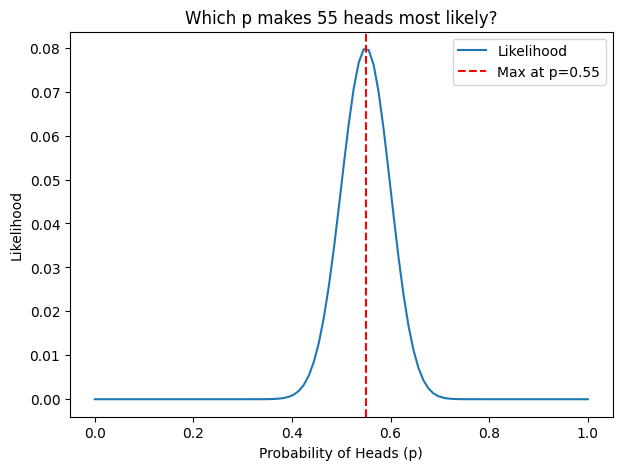


The highest point is at p = 0.55 (the observed frequency). This is the MLE!


In [32]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

# Number of times the coin is flipped
n_flips = 100
# Number of heads observed
n_heads = 55
# Possible values of p (probability of heads)
p_values = np.linspace(0, 1, 100)
# Likelihood of observing n_heads for each value of p
likelihoods = binom.pmf(n_heads, n_flips, p_values)

# Print a few likelihoods for illustration
print("Trying different probabilities for the coin:")
for p in [0.2, 0.5, 0.55, 0.9]:
    like = binom.pmf(n_heads, n_flips, p)
    print(f"If p = {p:.2f}, likelihood of 55 heads = {like:.6f}")

plt.figure(figsize=(7, 5))
# Plot the likelihoods
plt.plot(p_values, likelihoods, label='Likelihood')
# Mark the maximum likelihood estimate
plt.axvline(n_heads/n_flips, color='red', linestyle='--', label=f'Max at p={n_heads/n_flips:.2f}')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Likelihood')
plt.title('Which p makes 55 heads most likely?')
plt.legend()
plt.show()

print(f"\nThe highest point is at p = {n_heads/n_flips:.2f} (the observed frequency). This is the MLE!")

# 8. MLE for Binomial Variables: Coin Flip Example

Let's make this even simpler:

### Why does the log-likelihood curve look like a hill?
- Imagine you are guessing the true probability of heads (p) for a coin.
- For each guess (p), you ask: "If the coin had this probability, how likely is it to see 55 heads out of 100?"
- If your guess is way off (like p=0.1 or p=0.9), it's very unlikely to see 55 heads. The score (log-likelihood) is low.
- If your guess is close to what you actually saw (p=0.55), it's much more likely. The score is high.

### The curve is highest at the best guess
- The curve is shaped like a hill because there's one best guess (the top), and the further you move away from it, the less likely your guess explains the data.
- The top of the hill is at p = 0.55 (the observed frequency).

### Visual analogy
- Imagine standing on a hill. The top is your best guess for p. If you walk left or right (try smaller or bigger p), you go down the hill (the guess gets worse).

### In summary
- The log-likelihood curve is highest where your guess for p matches what you saw.
- That's why the curve is shaped like a hill, with the peak at the observed frequency.

Let's look at the curve again in the next cell and see where the top is!

## Why is the log-likelihood curve wider than the likelihood curve?

Let's make this super clear with a simple analogy:

- **Think of the likelihood curve (Chapter 7) as a very steep hill.**
    - The numbers (likelihoods) get small very quickly as you move away from the best guess.
    - This makes the curve look tall and narrow.
- **The log-likelihood curve (Chapter 8) is like flattening that hill.**
    - Taking the log of small numbers (likelihoods) turns them into negative numbers, but spreads them out more evenly.
    - This makes the curve look wider and less steep, but the top is still at the same place (the best guess).

### Why do we use log-likelihood?
- The log-likelihood is easier to work with (especially for math and computers), and it helps us see differences between guesses more clearly.
- The shape (a hill) is the same, but it's stretched out sideways, so you can see more of the "landscape."

### Visual analogy
- Imagine you have a very steep, pointy mountain (likelihood curve). It's hard to walk on and hard to see the details.
- If you gently press down on the top, the mountain flattens and spreads out (log-likelihood curve). Now it's easier to see the differences between guesses, and the top is still in the same place.

**In summary:**
- The log-likelihood curve is wider because taking the log spreads out the values, making the differences between guesses easier to see and work with.
- Both curves have their peak at the same place (the best guess for p), but the log-likelihood is just a "stretched out" version of the likelihood curve.

## Why is a wider log-likelihood curve important?

A wider log-likelihood curve is important because it makes the differences between possible parameter values (like $p$) much easier to see and work with, especially for optimization and learning:

- The likelihood curve is very steep and narrow, so small changes in $p$ can cause huge changes in likelihood. This makes it hard for computers (and humans) to compare values or find the best one.
- The log-likelihood curve spreads out these differences, making the “hill” smoother and wider. This helps optimization algorithms (like gradient descent) move toward the best value more steadily, without getting stuck or making wild jumps.
- Mathematically, the log-likelihood is easier to add up (since logs turn products into sums), which is much more stable and efficient for calculations.

**In summary:** The wider log-likelihood curve makes it easier, safer, and more reliable to find the best parameter values when training models. That’s why we use it!

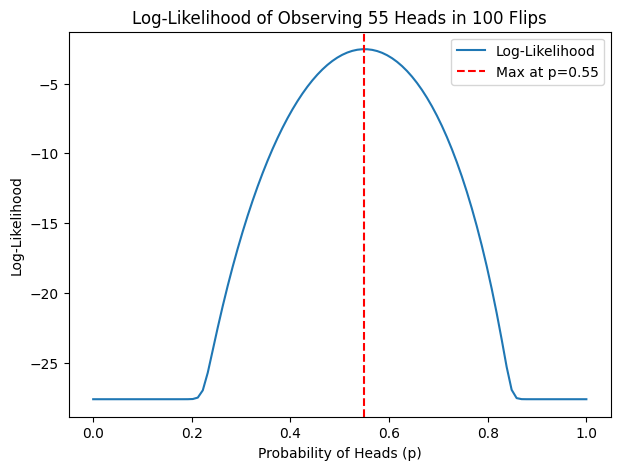

In [33]:
log_likelihoods = np.log(likelihoods + 1e-12)  # Avoid log(0)

plt.figure(figsize=(7, 5))
plt.plot(p_values, log_likelihoods, label='Log-Likelihood')
plt.axvline(n_heads/n_flips, color='red', linestyle='--', label=f'Max at p={n_heads/n_flips:.2f}')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood of Observing 55 Heads in 100 Flips')
plt.legend()
plt.show()

# 9. MLE and Logistic Regression: Mathematical Connection

Logistic regression uses MLE to estimate the best parameters (coefficients) for predicting the probability of class 1.

## Likelihood Function for Logistic Regression

For each observation $i$:

- $\pi_i = P(y_i = 1 | x_i) = \sigma(\beta_0 + \beta_1 x_i)$
- Likelihood: $L(\beta) = \prod_i \pi_i^{y_i} (1-\pi_i)^{1-y_i}$
- Log-likelihood: $\ell(\beta) = \sum_i [y_i \log \pi_i + (1-y_i) \log(1-\pi_i)]$

The goal is to find $\beta$ that maximizes the log-likelihood.

Let's simulate logistic regression data and plot the log-likelihood for different parameter values.

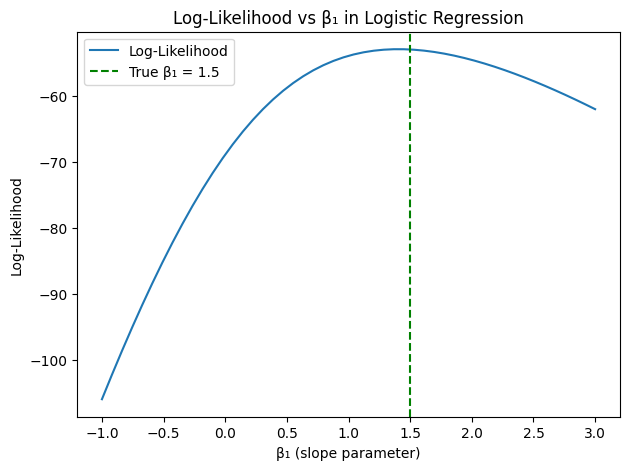

In [34]:
# Simulate logistic regression data
np.random.seed(0)
x = np.random.normal(0, 1, 100)
true_beta0, true_beta1 = -0.5, 1.5
z = true_beta0 + true_beta1 * x
p = sigmoid(z)
y = np.random.binomial(1, p)

# Calculate log-likelihood for different beta1 values
beta1_values = np.linspace(-1, 3, 50)
log_likelihoods = []
for beta1 in beta1_values:
    z_test = true_beta0 + beta1 * x
    p_test = sigmoid(z_test)
    ll = np.sum(y * np.log(p_test + 1e-10) + (1 - y) * np.log(1 - p_test + 1e-10))
    log_likelihoods.append(ll)

plt.figure(figsize=(7, 5))
plt.plot(beta1_values, log_likelihoods, label='Log-Likelihood')
plt.axvline(true_beta1, color='green', linestyle='--', label=f'True β₁ = {true_beta1}')
plt.xlabel('β₁ (slope parameter)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs β₁ in Logistic Regression')
plt.legend()
plt.show()

# 10. Gradient Descent: Concept and Visualization

**Gradient descent** is an optimization algorithm used to find the parameters that minimize (or maximize) a function, such as the negative log-likelihood in logistic regression.

## Mountain Climbing Analogy

Imagine you're on a foggy mountain and want to reach the lowest point (the minimum):
- You feel the slope under your feet (compute the gradient)
- Take a step downhill (update parameters)
- Repeat until you can't go any lower (converge)

## Visualizing Gradient Descent: Step by Step

Let's break down gradient descent using several simple images and explanations:

1. **The Cost Function (the "hill" or "valley")**
   - Imagine a curve (like a bowl or hill). The lowest point is where the cost (error) is smallest. Our goal is to find this minimum.

2. **Parameters ($x$ or $w$) and the Cost**
   - The horizontal axis is the parameter we're adjusting (e.g., $x$ or $w$). The vertical axis is the cost for each value.

3. **The Gradient (Slope) at a Point**
   - The gradient is the slope of the curve at your current position. It tells you which way is downhill (toward lower cost).

4. **Taking a Step: Parameter Update**
   - We move a small step in the direction of the negative gradient (downhill). The size of the step is controlled by the learning rate ($\alpha$).

5. **Learning Rate ($\alpha$)**
   - If $\alpha$ is too small, steps are tiny and it takes a long time to reach the minimum.
   - If $\alpha$ is too large, you might overshoot or bounce around and never settle at the minimum.

6. **The Path of Gradient Descent**
   - By repeating the process (compute gradient, take a step), we move closer and closer to the minimum.

We'll show all these ideas with simple matplotlib plots in the next cells!

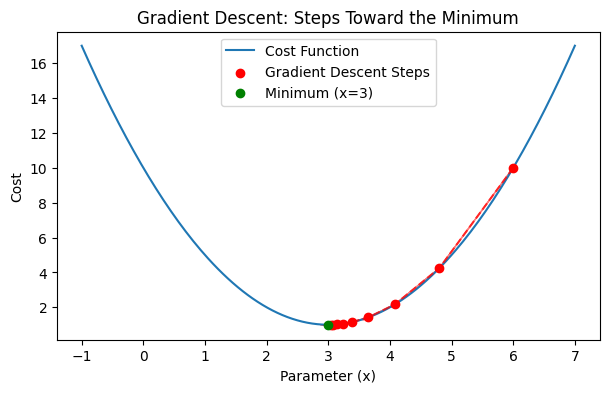

In [35]:
# Define the cost function and visualize the full path of gradient descent steps
def cost(x):
    return (x - 3) ** 2 + 1

# Create the cost function curve
x_vals = np.linspace(-1, 7, 200)
y_vals = cost(x_vals)

# Gradient descent steps
x = 6.0
alpha = 0.2
steps = [x]
for _ in range(8):
    x = x - alpha * (2 * (x - 3))
    steps.append(x)

plt.figure(figsize=(7, 4))
plt.plot(x_vals, y_vals, label='Cost Function')
plt.scatter(steps, [cost(s) for s in steps], color='red', zorder=5, label='Gradient Descent Steps')
plt.plot(steps, [cost(s) for s in steps], 'r--', alpha=0.7)
plt.scatter([3], [cost(3)], color='green', zorder=6, label='Minimum (x=3)')
for i in range(len(steps)-1):
    plt.arrow(steps[i], cost(steps[i]), steps[i+1]-steps[i], cost(steps[i+1])-cost(steps[i]), head_width=0.12, head_length=0.18, fc='red', ec='red', alpha=0.5)
plt.title('Gradient Descent: Steps Toward the Minimum')
plt.xlabel('Parameter (x)')
plt.ylabel('Cost')
plt.legend()
plt.show()

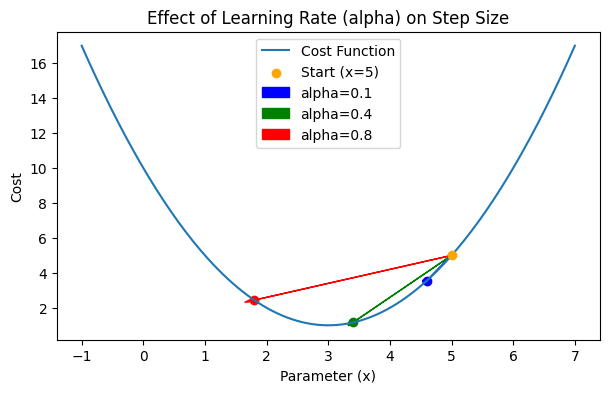

In [36]:
# Visualize the effect of different learning rates (alpha)
def cost(x):
    return (x - 3) ** 2 + 1

# Create the cost function curve
x_vals = np.linspace(-1, 7, 200)
y_vals = cost(x_vals)

start_x = 5
slope = 2 * (start_x - 3)
y_start = cost(start_x)

alphas = [0.1, 0.4, 0.8]
colors = ['blue', 'green', 'red']

plt.figure(figsize=(7, 4))
plt.plot(x_vals, y_vals, label='Cost Function')
plt.scatter([start_x], [y_start], color='orange', zorder=5, label=f'Start (x={start_x})')

for alpha, color in zip(alphas, colors):
    new_x = start_x - alpha * slope
    new_y = cost(new_x)
    plt.arrow(start_x, y_start, new_x - start_x, new_y - y_start, head_width=0.15, head_length=0.2, fc=color, ec=color, label=f'alpha={alpha}')
    plt.scatter([new_x], [new_y], color=color)

plt.title('Effect of Learning Rate (alpha) on Step Size')
plt.xlabel('Parameter (x)')
plt.ylabel('Cost')
plt.legend()
plt.show()

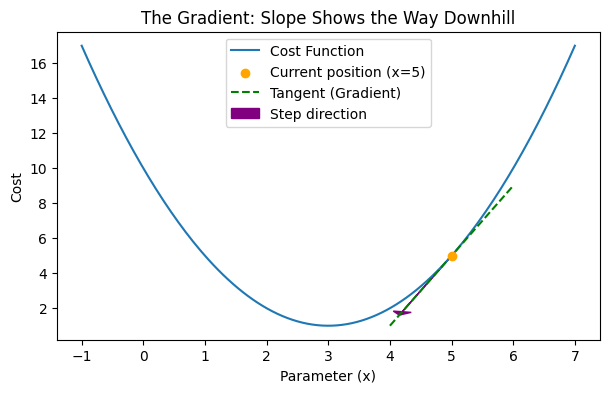

In [37]:
# Visualize the gradient (slope) at a point
def cost(x):
    return (x - 3) ** 2 + 1

# Create the cost function curve
x_vals = np.linspace(-1, 7, 200)
y_vals = cost(x_vals)

x0 = 5  # Example starting point
slope = 2 * (x0 - 3)

y0 = cost(x0)

tangent_x = np.linspace(x0 - 1, x0 + 1, 10)
tangent_y = slope * (tangent_x - x0) + y0

plt.figure(figsize=(7, 4))
plt.plot(x_vals, y_vals, label='Cost Function')
plt.scatter([x0], [y0], color='orange', zorder=5, label=f'Current position (x={x0})')
plt.plot(tangent_x, tangent_y, 'g--', label='Tangent (Gradient)')
plt.arrow(x0, y0, -0.8, -slope * 0.8, head_width=0.3, head_length=0.2, fc='purple', ec='purple', label='Step direction')
plt.title('The Gradient: Slope Shows the Way Downhill')
plt.xlabel('Parameter (x)')
plt.ylabel('Cost')
plt.legend()
plt.show()

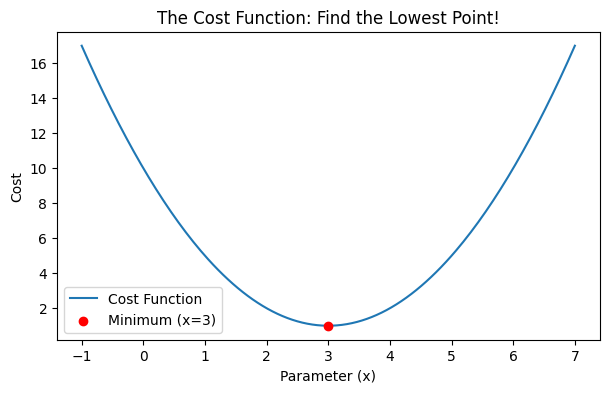

In [38]:
# Visualize the cost function (hill/valley)
import numpy as np
import matplotlib.pyplot as plt

def cost(x):
    return (x - 3) ** 2 + 1

x_vals = np.linspace(-1, 7, 200)
y_vals = cost(x_vals)

plt.figure(figsize=(7, 4))
plt.plot(x_vals, y_vals, label='Cost Function')
plt.scatter([3], [cost(3)], color='red', zorder=5, label='Minimum (x=3)')
plt.title('The Cost Function: Find the Lowest Point!')
plt.xlabel('Parameter (x)')
plt.ylabel('Cost')
plt.legend()
plt.show()

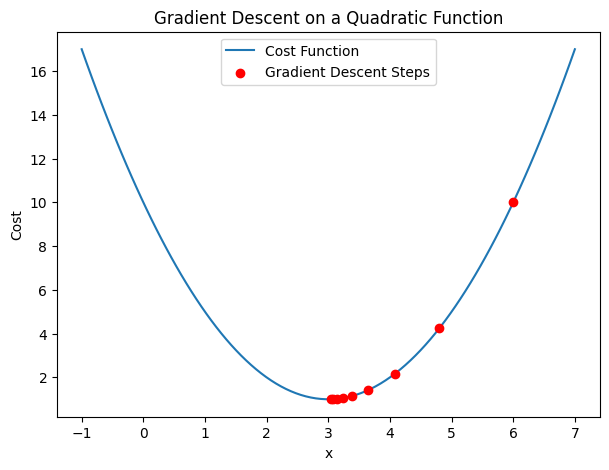

In [39]:
# Visualize gradient descent on a simple quadratic function

def cost(x):
    return (x - 3) ** 2 + 1

def grad(x):
    return 2 * (x - 3)

x_vals = np.linspace(-1, 7, 100)
y_vals = cost(x_vals)

# Gradient descent steps
x = 6.0
alpha = 0.2
steps = [x]
for _ in range(8):
    x = x - alpha * grad(x)
    steps.append(x)

plt.figure(figsize=(7, 5))
plt.plot(x_vals, y_vals, label='Cost Function')
plt.scatter(steps, [cost(s) for s in steps], color='red', zorder=5, label='Gradient Descent Steps')
plt.xlabel('x')
plt.ylabel('Cost')
plt.title('Gradient Descent on a Quadratic Function')
plt.legend()
plt.show()

## Why is Gradient Descent Important for Logistic Regression?

Gradient descent is a key tool for training logistic regression models, especially when we have many features or a large dataset.

- **Logistic regression tries to find the best parameters (weights) that make the model's predictions match the data.**
- The way we measure "best" is by using a cost function (like negative log-likelihood), which tells us how far off our predictions are from the actual results.
- **Gradient descent is an efficient way to find the parameter values that minimize this cost function.**
- For simple problems, we could sometimes solve for the best parameters with math, but for real-world data (many features, lots of data), that's not practical—so we use gradient descent!

**In summary:**
- Gradient descent helps us "learn" the best model by taking small steps to reduce errors, just like walking downhill to the lowest point.
- Without gradient descent (or a similar optimization method), we couldn't train logistic regression models on real data efficiently.

# 11. Implementing Logistic Regression with scikit-learn

Let's put everything together and build a logistic regression model using the Titanic dataset. We'll:
1. Load the data
2. Preprocess (handle missing values, encode categorical variables, scale features)
3. Split into train/test sets
4. Fit a logistic regression model

Let's start by loading the data.

In [40]:
# Load Titanic dataset
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# Preprocessing: handle missing values, encode categorical variables, scale features

df = titanic.copy()

# Fill missing Age with median, Embarked with mode
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode Sex and Embarked
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

For binary categorical variables, label encoding is simpler and just as effective as one-hot encoding. One-hot encoding is more useful for features with three or more categories, to avoid implying any ordinal relationship.

In [42]:
# Split into train/test sets and fit logistic regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept:', logreg.intercept_)
print('Coefficients:', logreg.coef_)

Intercept: [-0.62317734]
Coefficients: [[-0.79601812 -1.28398869 -0.39638824 -0.32829928 -0.09814804  0.12143481
  -0.04662367 -0.19299076]]


# 12. Model Evaluation and Interpretation

Let's evaluate our logistic regression model using accuracy, confusion matrix, and a classification report. We'll also interpret the coefficients to understand feature importance.

Accuracy: 0.81

Confusion Matrix:


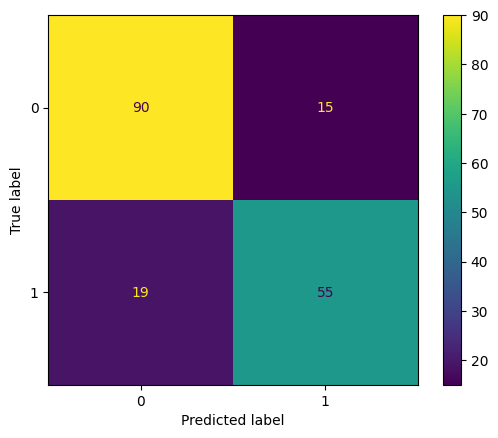


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Pclass: -0.80
Sex: -1.28
Age: -0.40
SibSp: -0.33
Parch: -0.10
Fare: 0.12
Embarked_Q: -0.05
Embarked_S: -0.19


In [43]:
# Evaluate model
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')
print('\nConfusion Matrix:')
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.show()

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Feature importance
feature_names = features
coefs = logreg.coef_[0]
for name, coef in zip(feature_names, coefs):
    print(f'{name}: {coef:.2f}')

## Understanding the Classification Report and Feature Coefficients

**Precision:**
- Out of all the times the model predicted a class (e.g., “1” for survived), how many were actually correct?
- Formula: Precision = True Positives / (True Positives + False Positives)
- High precision means few false alarms.

**Recall:**
- Out of all the actual cases of a class (e.g., all who actually survived), how many did the model correctly find?
- Formula: Recall = True Positives / (True Positives + False Negatives)
- High recall means few missed cases.

**F1-score:**
- The harmonic mean of precision and recall. It balances both.
- Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)
- High F1 means both precision and recall are good.

**Support:**
- The number of true samples for each class in the test set.
- Example: 105 people did not survive (class 0), 74 survived (class 1).

**Accuracy:**
- The proportion of total correct predictions.
- Formula: Accuracy = (True Positives + True Negatives) / Total Samples
- In your report: 0.81 means 81% of predictions were correct.

---

**Explaining the values in your report:**

- For class 0 (did not survive):
  - Precision: 0.83 (83% of predicted “not survived” were correct)
  - Recall: 0.86 (86% of all who did not survive were found)
  - F1-score: 0.84 (balance of precision and recall)
  - Support: 105 (actual number of “not survived”)

- For class 1 (survived):
  - Precision: 0.79 (79% of predicted “survived” were correct)
  - Recall: 0.74 (74% of all who survived were found)
  - F1-score: 0.76
  - Support: 74

- Macro avg: Average of metrics for both classes (treats all classes equally).
- Weighted avg: Average weighted by support (accounts for class imbalance).

---

**Feature coefficients (Pclass, Sex, etc.):**
- These show the effect of each feature on the prediction (in logistic regression).
- Negative value: decreases the chance of survival (e.g., being male, higher Pclass).
- Positive value: increases the chance of survival (e.g., higher Fare).
- The larger the absolute value, the stronger the effect.

**Example coefficients:**
- Pclass: -0.80 (higher class number, lower chance of survival)
- Sex: -1.28 (being male decreases chance of survival)
- Age: -0.40 (older age decreases chance)
- Fare: 0.12 (higher fare increases chance)
- Embarked_Q: -0.05, Embarked_S: -0.19 (embarkation port effects)


## Sensitivity vs. Specificity: What’s the Difference?

**Sensitivity (Recall or True Positive Rate):**
- Measures how well a test or model identifies actual positives.
- Formula: Sensitivity = True Positives / (True Positives + False Negatives)
- High sensitivity means few actual positives are missed (few false negatives).
- **Important when:** Missing a positive case is costly (e.g., disease screening, fraud detection).

**Specificity (True Negative Rate):**
- Measures how well a test or model identifies actual negatives.
- Formula: Specificity = True Negatives / (True Negatives + False Positives)
- High specificity means few actual negatives are incorrectly labeled as positive (few false positives).
- **Important when:** False alarms are costly or disruptive (e.g., criminal justice, spam filters).

**Summary:**
- Use **sensitivity** when it’s critical to catch all positives, even if some negatives are incorrectly flagged.
- Use **specificity** when it’s critical to avoid false alarms, even if some positives are missed.

## ROC Curve and AUC: Visualizing Model Performance

**ROC (Receiver Operating Characteristic) Curve:**
- A graph that shows how well a binary classifier performs at different threshold values.
- X-axis: False Positive Rate (1 - Specificity) = FP / (FP + TN)
- Y-axis: True Positive Rate (Sensitivity/Recall) = TP / (TP + FN)
- Each point on the curve represents a different threshold for classifying predictions as positive or negative.

**AUC (Area Under the Curve):**
- Measures the entire area underneath the ROC curve.
- AUC = 1.0: Perfect classifier
- AUC = 0.5: Random classifier (diagonal line)
- AUC = 0.0: Perfectly wrong classifier (can be inverted to be perfect)

**Why ROC is useful:**
- Shows the trade-off between sensitivity and specificity across all thresholds.
- Helps you choose the best threshold for your specific needs.
- AUC provides a single number to compare different models.

Let's plot the ROC curve for our Titanic survival model!

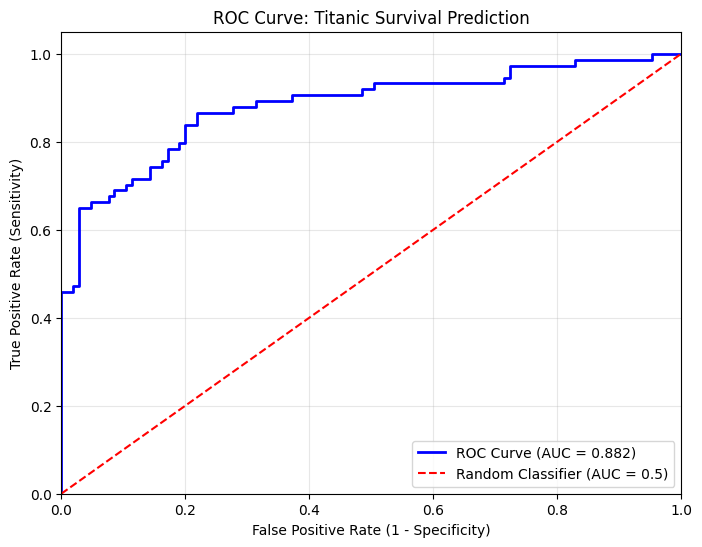

AUC Score: 0.882
Interpretation: The model is good


In [44]:
# Plot ROC Curve and calculate AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get prediction probabilities (not just 0/1 predictions)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1 (survived)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve: Titanic Survival Prediction')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f'AUC Score: {auc:.3f}')
print(f'Interpretation: The model is {"excellent" if auc > 0.9 else "good" if auc > 0.8 else "fair" if auc > 0.7 else "poor" if auc > 0.6 else "barely better than random"}')

## Interpreting AUC and When to Use ROC

**AUC Interpretation Guidelines:**
- **0.90-1.00**: Excellent discrimination
- **0.80-0.90**: Good discrimination  
- **0.70-0.80**: Fair discrimination
- **0.60-0.70**: Poor discrimination
- **0.50-0.60**: Fail (barely better than random)

**When to use ROC curves:**
- ✅ **Good for**: Balanced datasets or when both false positives and false negatives are equally important
- ✅ **Good for**: Comparing multiple models at once
- ✅ **Good for**: Understanding model performance across all possible thresholds

**When NOT to use ROC curves:**
- ❌ **Avoid for**: Highly imbalanced datasets (use Precision-Recall curves instead)
- ❌ **Misleading when**: One class is much more frequent than the other

**Example:** In our Titanic dataset, we have a somewhat balanced dataset (more people died than survived, but not extremely imbalanced), so ROC-AUC is appropriate for evaluation.

---

# 🎉 Conclusion

Congratulations! You've completed a comprehensive, beginner-friendly journey through logistic regression and maximum likelihood estimation (MLE). You learned:
- The difference between regression and classification
- Why logistic regression is ideal for binary outcomes
- The role of the sigmoid function
- How MLE underpins logistic regression
- How gradient descent optimizes model parameters
- How to implement and evaluate logistic regression in Python

**Next steps:**
- Try logistic regression on your own datasets
- Explore regularization (L1/L2) and advanced evaluation metrics
- Learn about other classification algorithms (e.g., decision trees, SVMs)

Happy modeling! 🚀